Easy

In [24]:
import pandas as pd

content = pd.read_csv('../marketing_campaign.csv', sep=';')
content.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [25]:
print(f"Количество жалоб: {content['Complain'].sum()}")

Количество жалоб: 21


In [26]:
Mnt_names = [x for x in content.columns if x[:3] == "Mnt"]
Mnt_names

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [27]:
content['MntAll'] = content[Mnt_names].sum(axis=1)
content['Age'] = (2024 - content['Year_Birth'])
print(f"Cредний возраст покупателей: {content.loc[content['MntAll'] > 0, 'Age'].mean()}")

Cредний возраст покупателей: 55.19419642857143


In [28]:
print(f"Средний возраст всех людей: {content['Age'].mean()}")

Средний возраст всех людей: 55.19419642857143


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

Gr_names = ['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'NumWebPurchases', 'NumStorePurchases', 'Age']

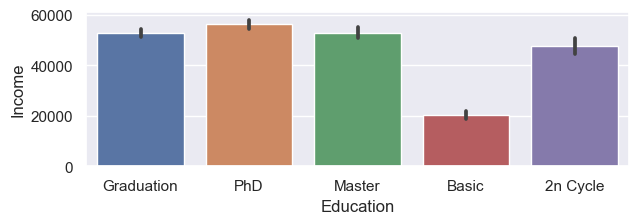

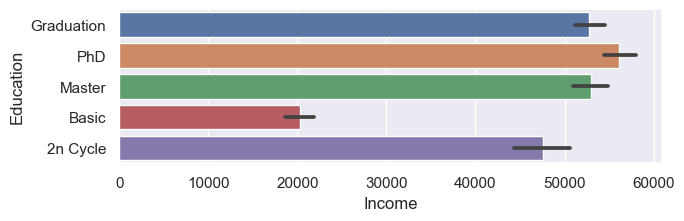

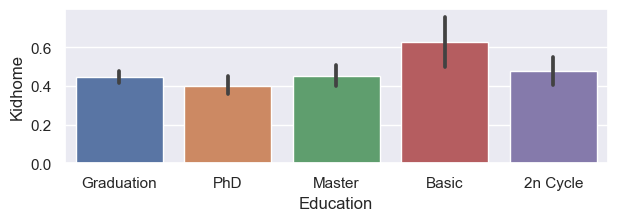

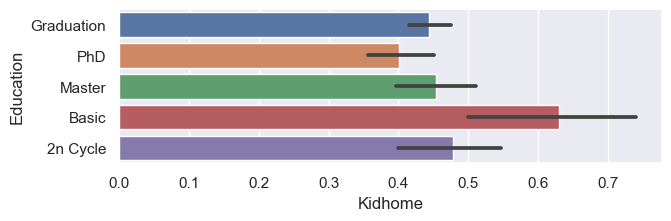

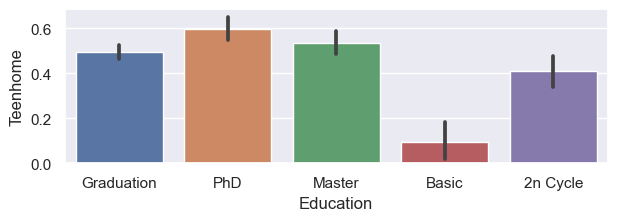

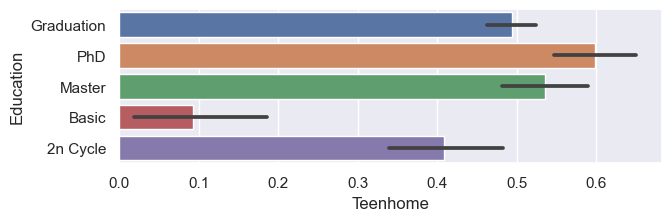

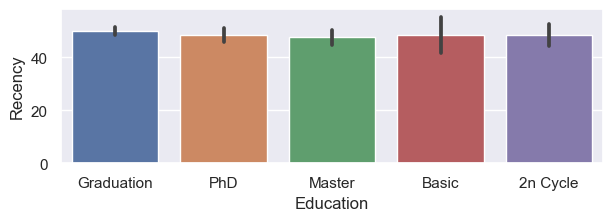

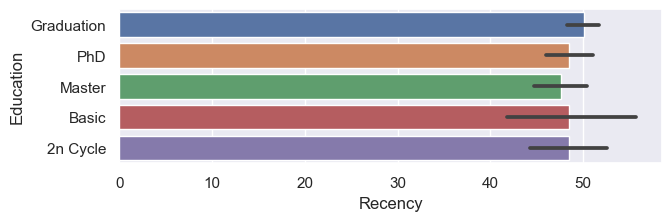

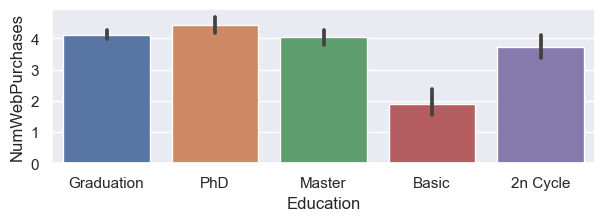

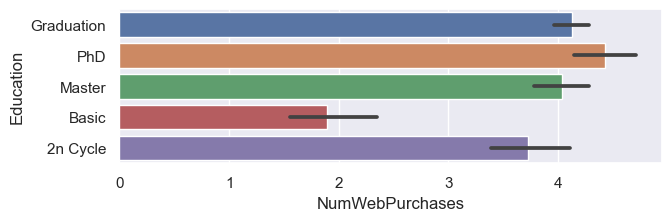

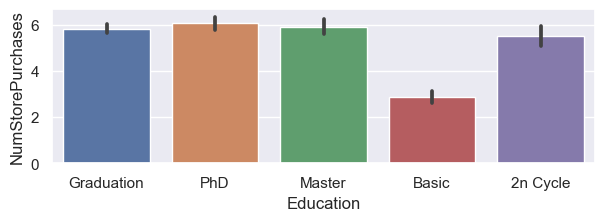

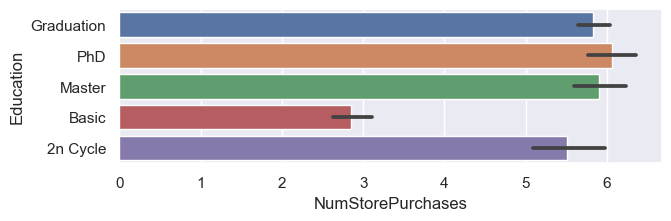

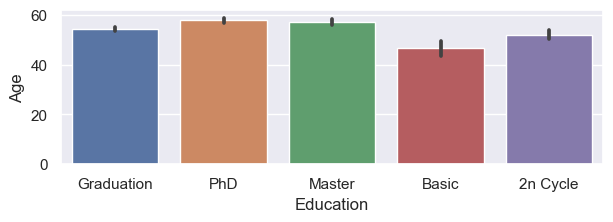

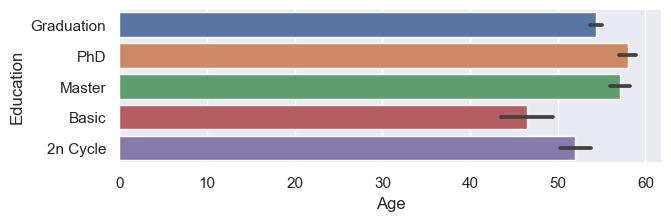

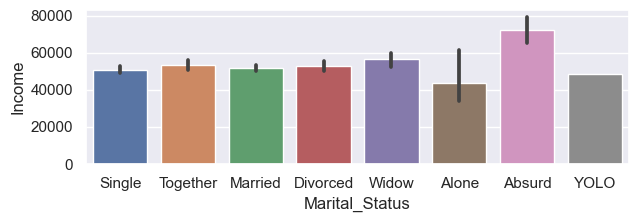

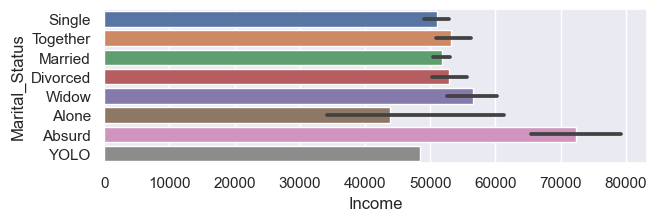

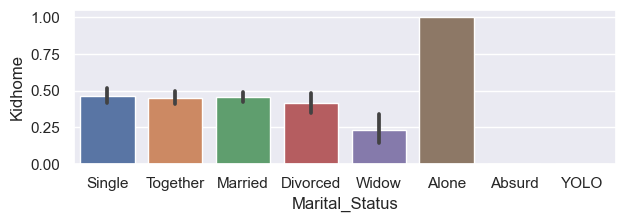

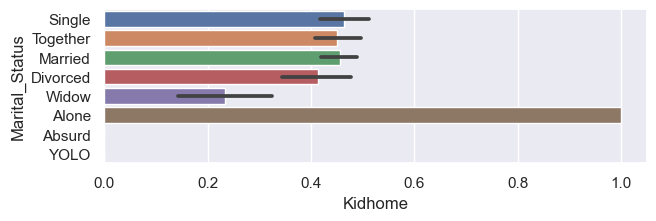

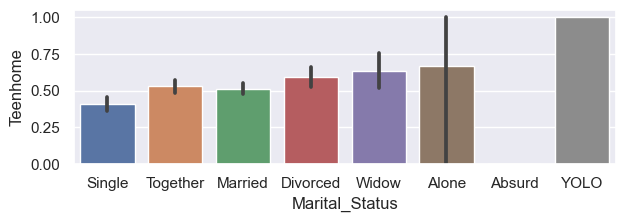

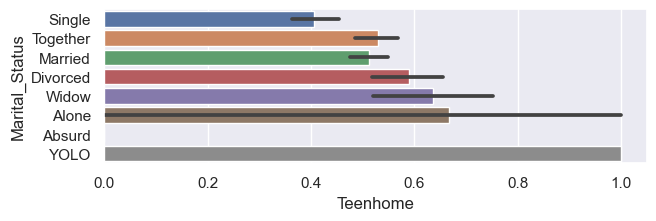

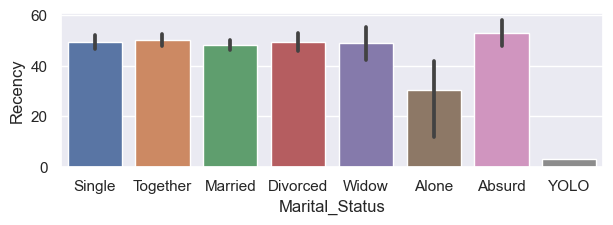

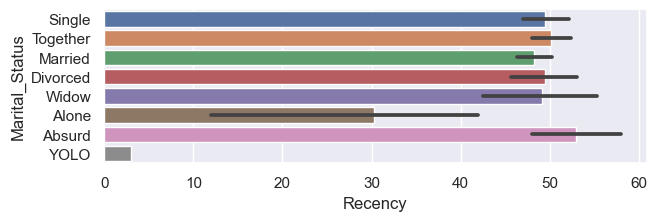

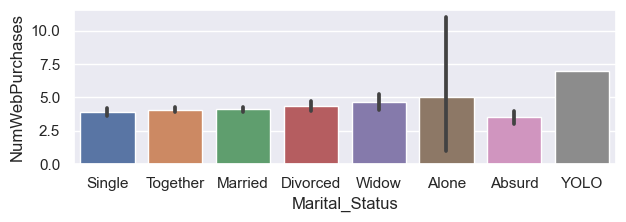

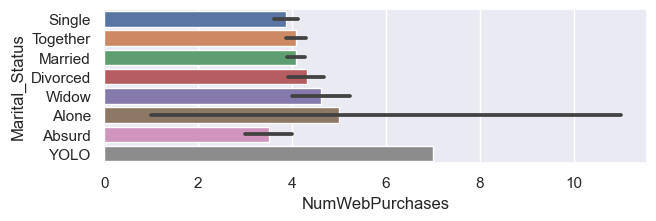

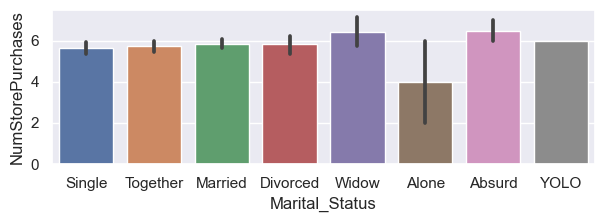

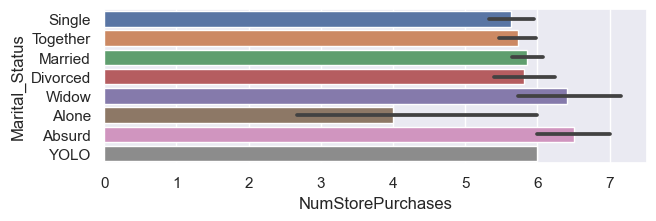

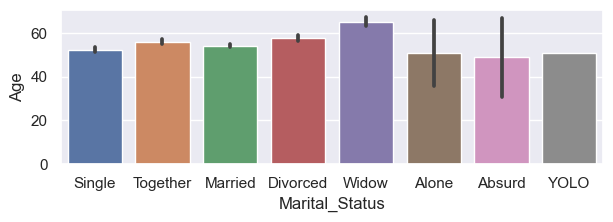

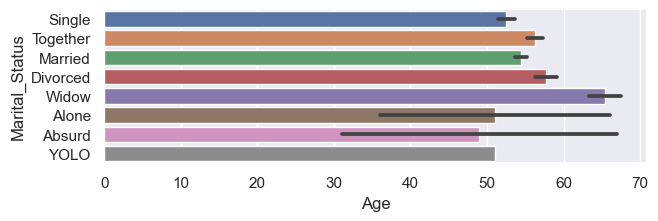

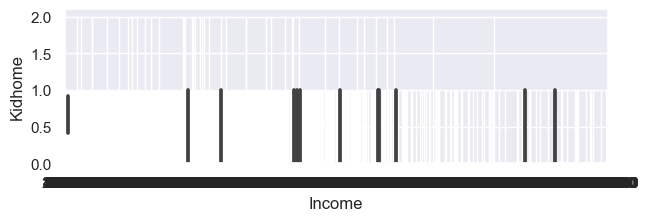

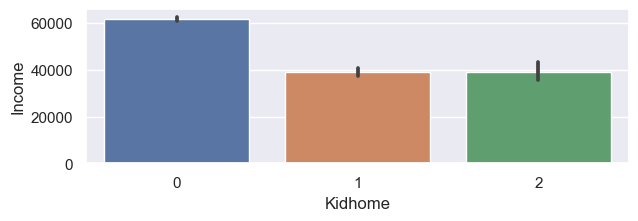

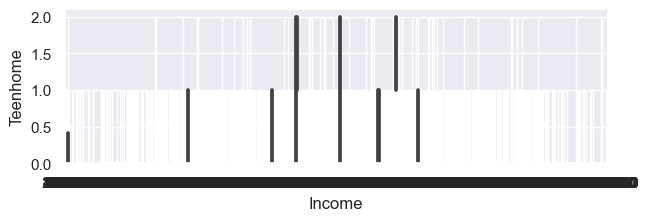

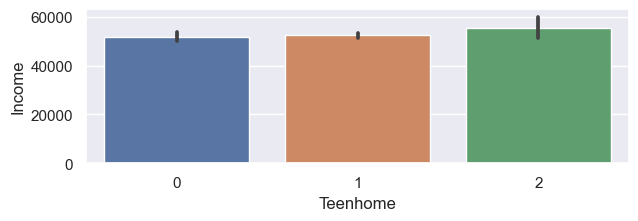

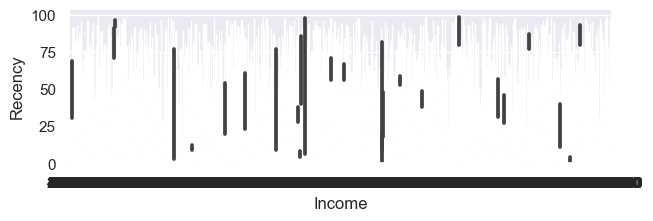

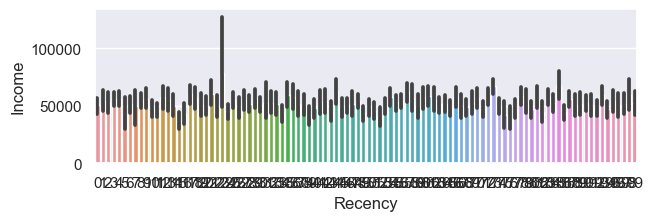

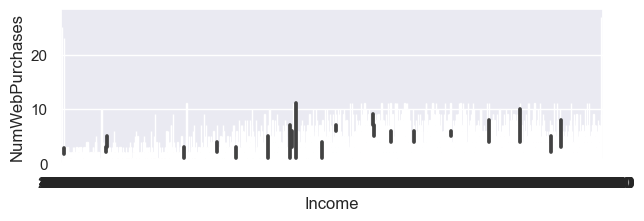

/Users/timurabdulkadirov/anaconda3/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


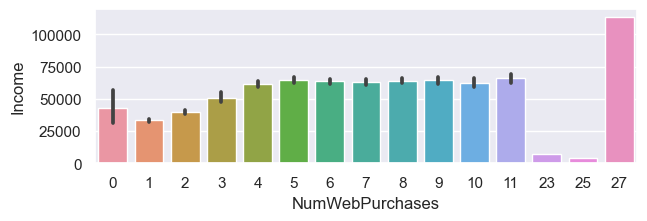

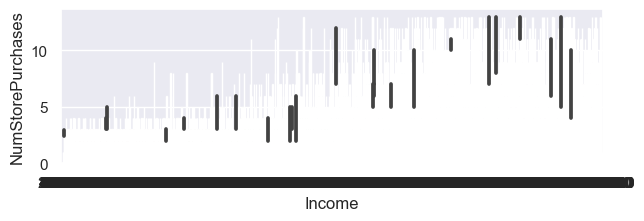

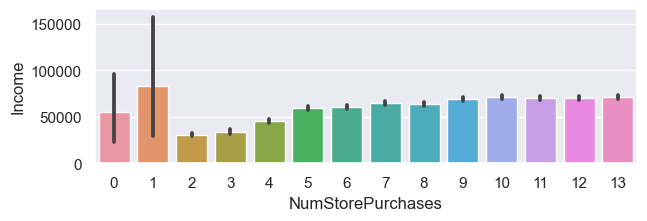

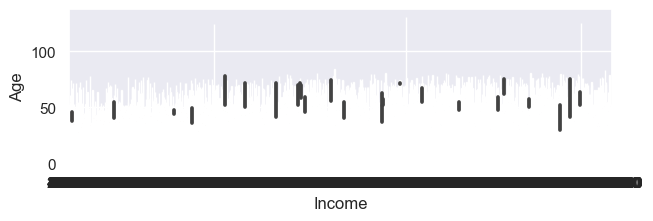

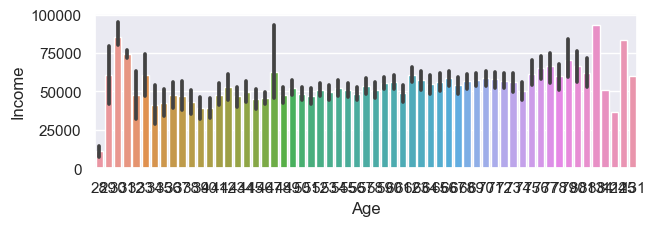

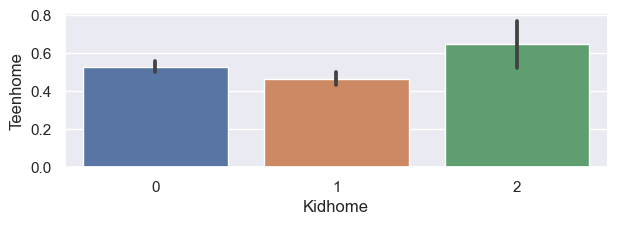

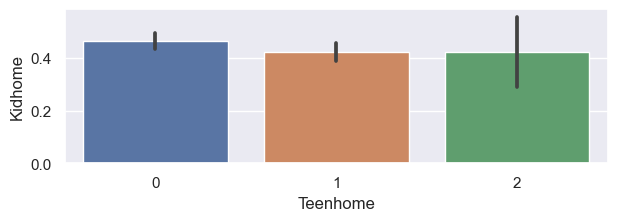

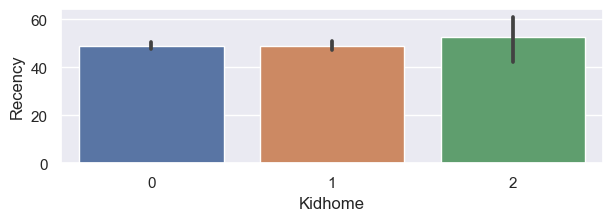

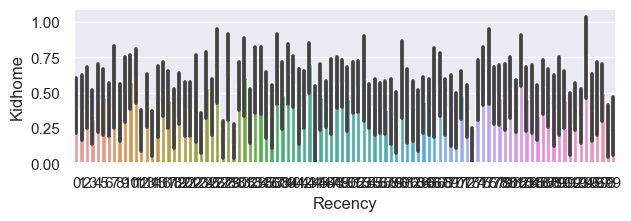

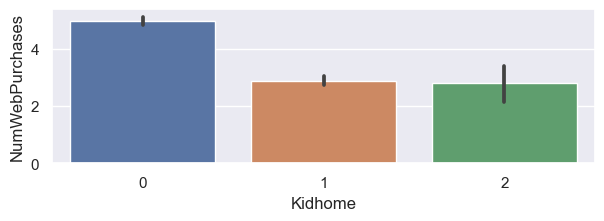

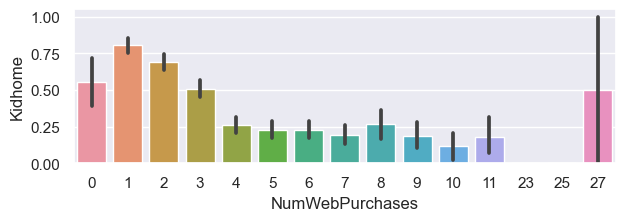

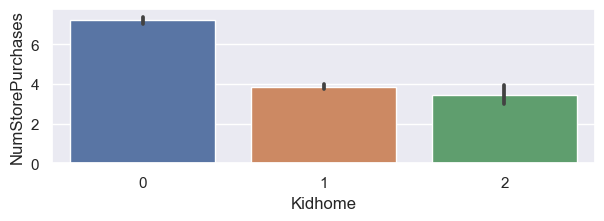

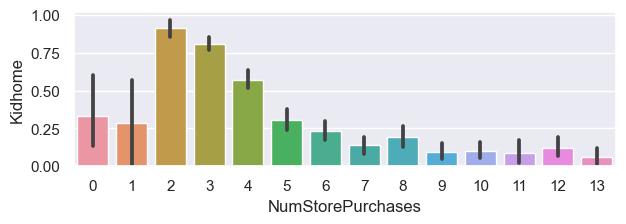

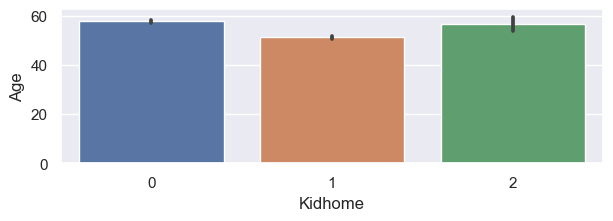

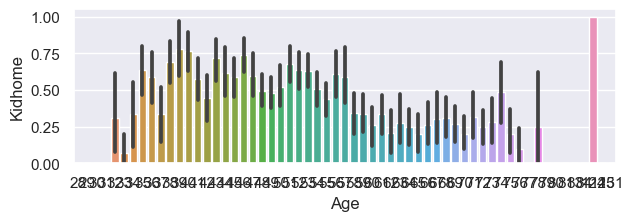

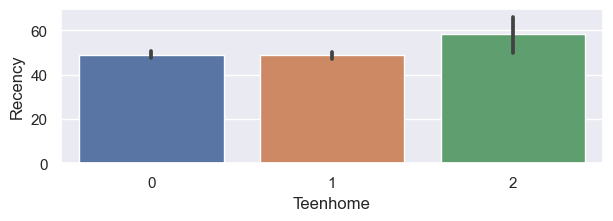

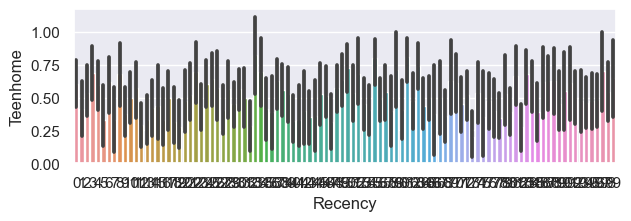

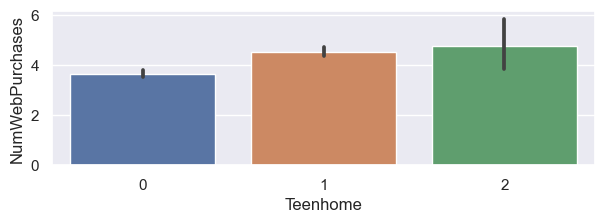

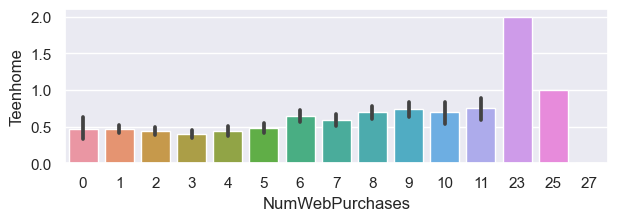

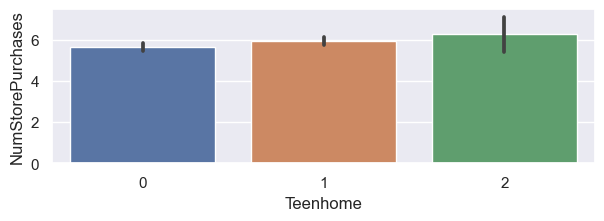

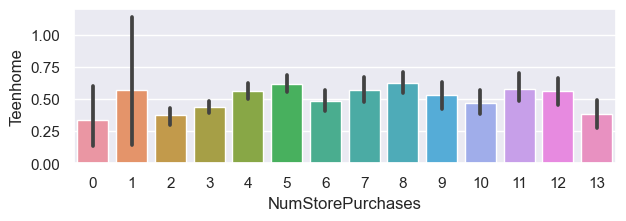

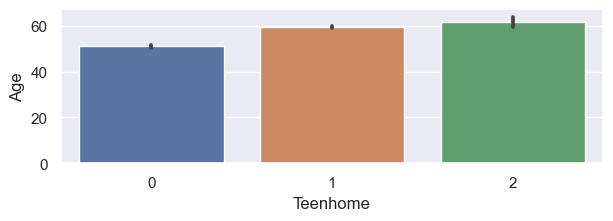

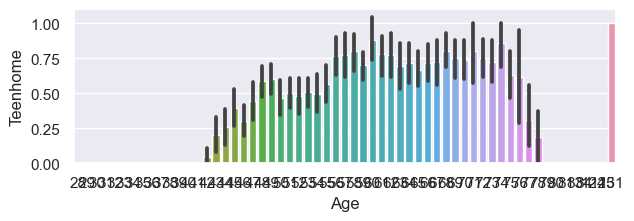

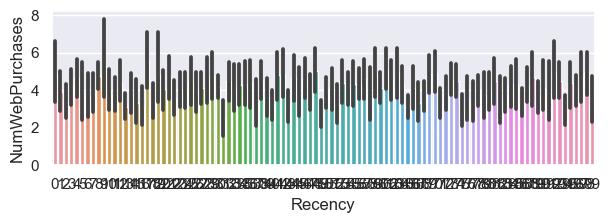

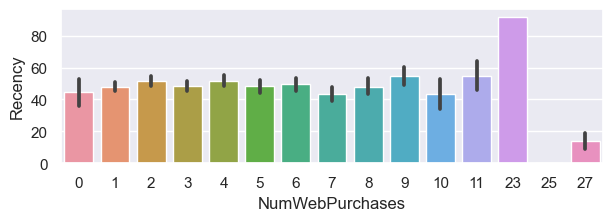

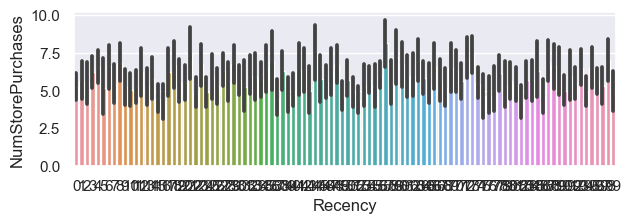

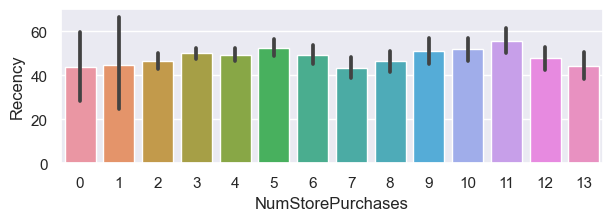

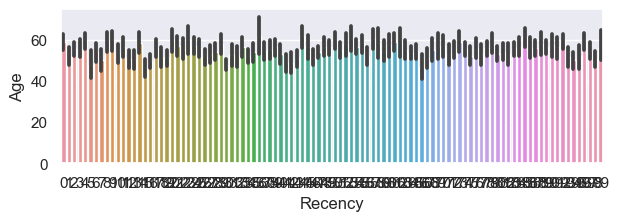

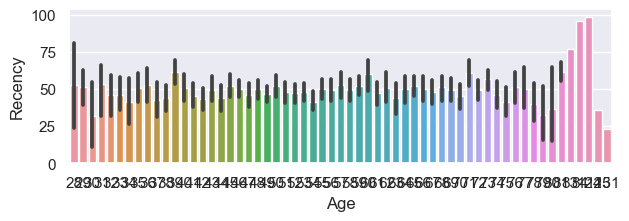

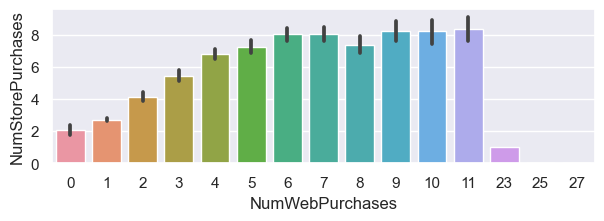

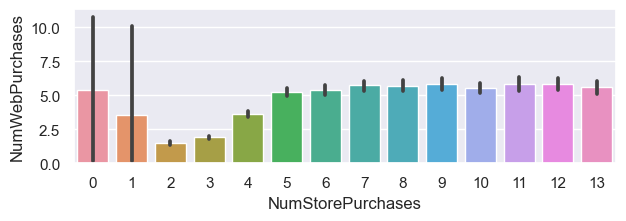

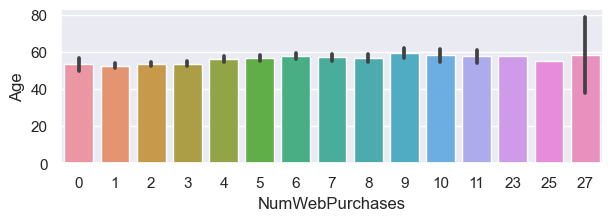

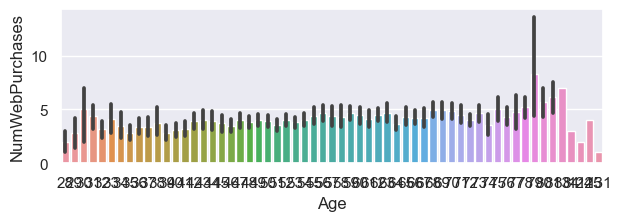

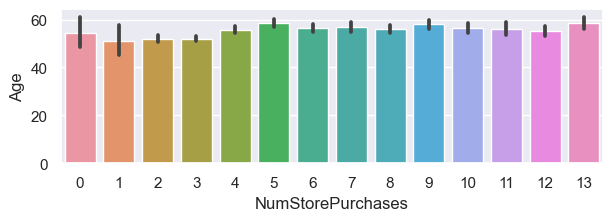

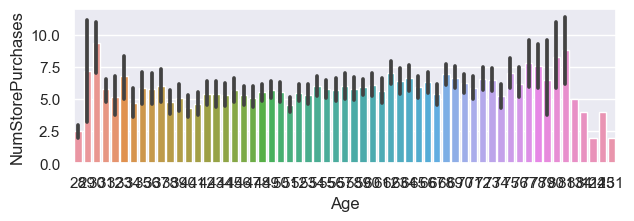

In [30]:
sns.set(rc={'figure.figsize':(7,2)})
for i in range(len(Gr_names)):
    for j in range(i+1, len(Gr_names)):
        try:
            sns.barplot(x=Gr_names[i], y=Gr_names[j], data=content)
            plt.show()
        except Exception:
            pass
        try:
            sns.barplot(x=Gr_names[j], y=Gr_names[i], data=content)
            plt.show()
        except Exception:
            pass

Как и ожидалось, многие колонки никак не связаны между собой.
Можно увидеть, что увеличение детей в доме связано с понижением доходов и понижением количества покупок, возраст не влияет на уровень дохода и на количество покупок.